House Price Prediction

In [ ]:
library(tidyverse) # metapackage of all tidyverse packages
library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(lubridate)
library(corrgram)
library(corrplot)



## Display dataset

In [ ]:
# load dataset
HouseDataSet <- read.csv("/content/sample_data/kc_house_data.csv")

In [ ]:
#DIPLAY THE OUTLINE OF THE DATA
summary(HouseDataSet)#summary of dataset
str(HouseDataSet)#structure of dataset
class(HouseDataSet)#class of objects
head(HouseDataSet)#display the first 6 objects
tail(HouseDataSet)#display the last 6 objects


       id                date               price            bedrooms     
 Min.   :1.000e+06   Length:21613       Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   Class :character   1st Qu.: 321950   1st Qu.: 3.000  
 Median :3.905e+09   Mode  :character   Median : 450000   Median : 3.000  
 Mean   :4.580e+09                      Mean   : 540088   Mean   : 3.371  
 3rd Qu.:7.309e+09                      3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09                      Max.   :7700000   Max.   :33.000  
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7618   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15107   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10688   3rd Qu.:2.000  
 Max.   :8.000   Max.   :13540   Max.   :1651359   Max.   :3.500  
   wat

'data.frame':	21613 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : chr  "20141013T000000" "20141209T000000" "20150225T000000" "20141209T000000" ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...
 $ yr_renovated :

[1] "data.frame"

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,⋯,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,⋯,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,⋯,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
21608,2997800021,20150219T000000,475000,3,2.50,1310,1294,2,0,0,⋯,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21609,263000018,20140521T000000,360000,3,2.50,1530,1131,3,0,0,⋯,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21610,6600060120,20150223T000000,400000,4,2.50,2310,5813,2,0,0,⋯,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21611,1523300141,20140623T000000,402101,2,0.75,1020,1350,2,0,0,⋯,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21612,291310100,20150116T000000,400000,3,2.50,1600,2388,2,0,0,⋯,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21613,1523300157,20141015T000000,325000,2,0.75,1020,1076,2,0,0,⋯,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


## Data Cleaning & Splitting Training/Testing sets

In [ ]:
##DATA CLEANING
HouseDataSet$date <- as.Date(as.Date(as.character(HouseDataSet$date),"%Y%m%d"))

In [ ]:
#SPLITTING THE DATA INTO TRAIN AND TEST DATA SETS
indexes = sample(1:nrow(HouseDataSet), size = 0.3*nrow(HouseDataSet))

In [ ]:
Test_data = HouseDataSet[indexes,]
dim(Test_data)
str(Test_data)
Train_data = HouseDataSet[-indexes,]
dim(Train_data)
str(Train_data)
table(is.na(Train_data))


[1] 6483   21

'data.frame':	6483 obs. of  21 variables:
 $ id           : num  4.08e+09 2.18e+09 5.82e+08 2.62e+09 1.70e+09 ...
 $ date         : Date, format: "2015-03-24" "2014-12-30" ...
 $ price        : num  738000 1700000 655000 242500 445000 ...
 $ bedrooms     : int  3 5 3 3 5 3 3 4 3 4 ...
 $ bathrooms    : num  1 5 1.75 1.5 3 4.5 2.5 2.5 1.75 2.25 ...
 $ sqft_living  : int  1280 4930 1960 1200 2930 5230 1425 3040 1420 1770 ...
 $ sqft_lot     : int  3900 14649 5520 9720 5500 17826 1179 6887 1361 7000 ...
 $ floors       : num  1 2 1 1 1 2 3 2 2 1 ...
 $ waterfront   : int  0 0 0 0 0 1 0 0 0 0 ...
 $ view         : int  0 3 0 0 0 4 0 0 0 0 ...
 $ condition    : int  4 3 4 4 3 3 3 3 3 5 ...
 $ grade        : int  7 11 7 7 7 10 8 8 7 7 ...
 $ sqft_above   : int  1280 4160 1080 1200 1750 3740 1425 3040 960 1770 ...
 $ sqft_basement: int  0 770 880 0 1180 1490 0 0 460 0 ...
 $ yr_built     : int  1921 2000 1952 1965 1951 2005 2008 1999 2014 1972 ...
 $ yr_renovated : int  0 0 0 0 0 0 0 0 0 0 ..

[1] 15130    21

'data.frame':	15130 obs. of  21 variables:
 $ id           : num  7.13e+09 5.63e+09 1.95e+09 7.24e+09 2.01e+09 ...
 $ date         : Date, format: "2014-10-13" "2015-02-25" ...
 $ price        : num  221900 180000 510000 1225000 291850 ...
 $ bedrooms     : int  3 2 3 4 3 3 3 3 2 3 ...
 $ bathrooms    : num  1 1 2 4.5 1.5 1 2.5 2.5 1 1 ...
 $ sqft_living  : int  1180 770 1680 5420 1060 1780 1890 3560 1160 1430 ...
 $ sqft_lot     : int  5650 10000 8080 101930 9711 7470 6560 9796 6000 19901 ...
 $ floors       : num  1 1 1 1 1 1 2 1 1 1.5 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 3 3 3 3 3 4 4 ...
 $ grade        : int  7 6 8 11 7 7 7 8 7 7 ...
 $ sqft_above   : int  1180 770 1680 3890 1060 1050 1890 1860 860 1430 ...
 $ sqft_basement: int  0 0 0 1530 0 730 0 1700 300 0 ...
 $ yr_built     : int  1955 1933 1987 2001 1963 1960 2003 1965 1942 1927 ...
 $ yr_renovated : int  0 0 0 0 0 0 0 0 0 0 ...
 $ zipc


 FALSE 
317730 

## Plot correlation between the attributes:

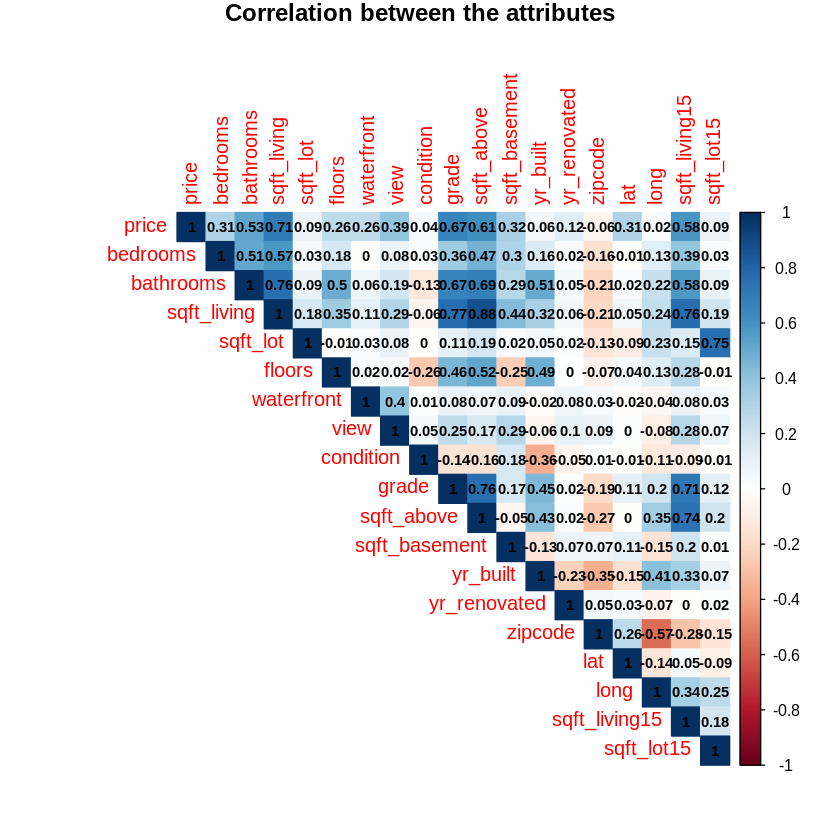

In [ ]:
#FINDING THE CORRELATION
Attribute_Corr <-cor(Train_data[3:21],method="pearson")

#PLOTTING THE CORRELATION

corrplot(Attribute_Corr,type="upper",method="color",addCoef.col = "black", title = "Correlation between the attributes", number.cex = 14/ncol(Train_data[3:21]), mar=c(1,1,1,1))

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“pseudoinverse used at 3”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“neighborhood radius 1”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“There are other near singularities as well. 1”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“pseudoinverse used at 3”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“neighborhood radius 1”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“There are other near singularities as well. 1”
Warning message in simpleLoess(y, x, w, span, degree = deg

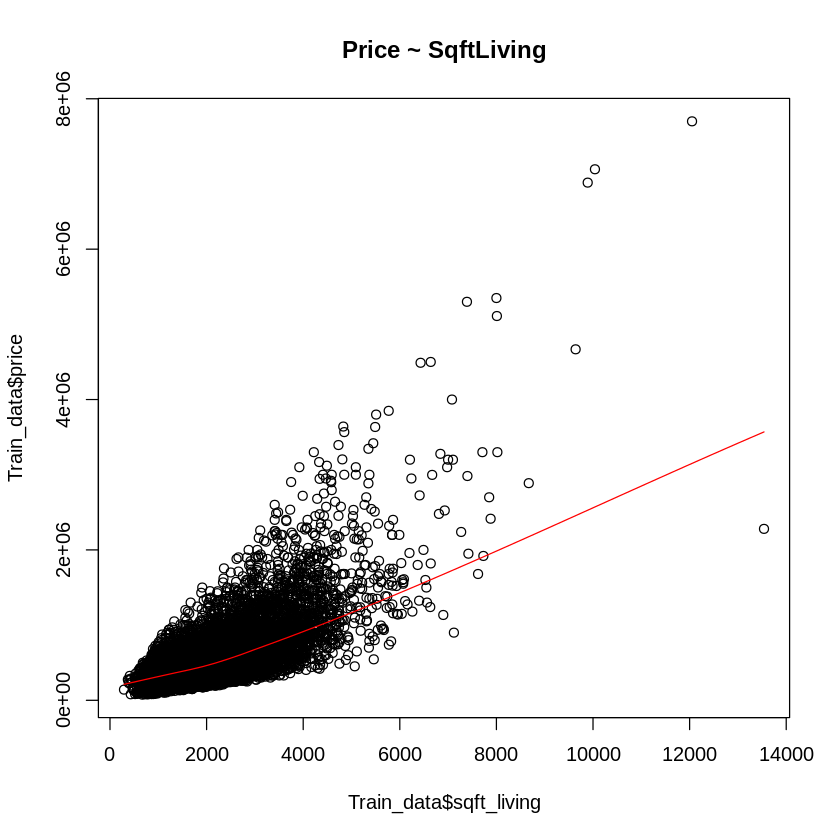

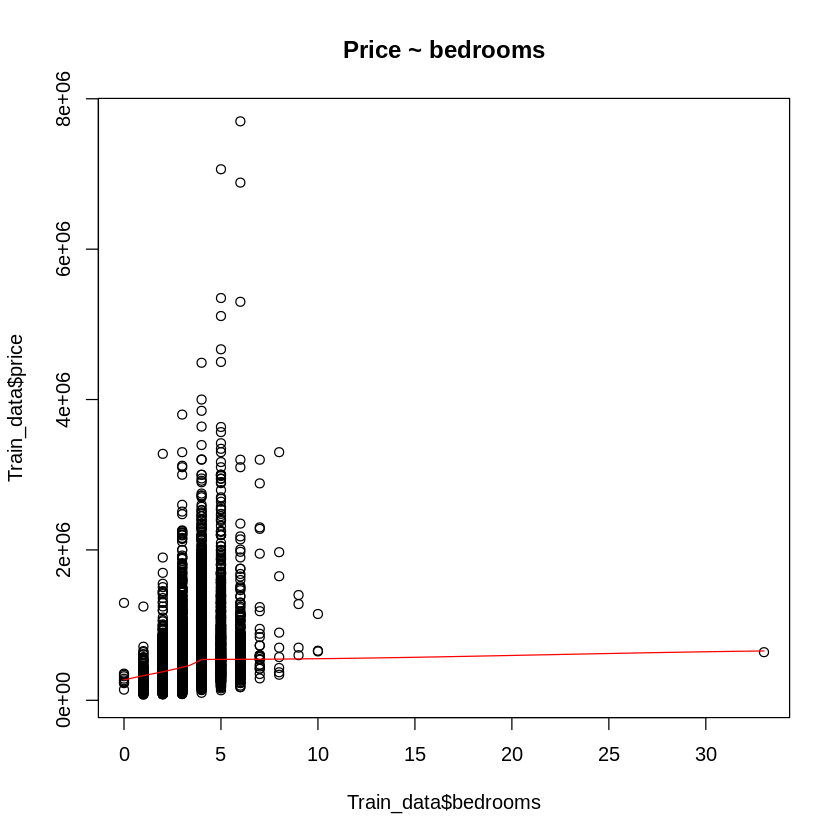

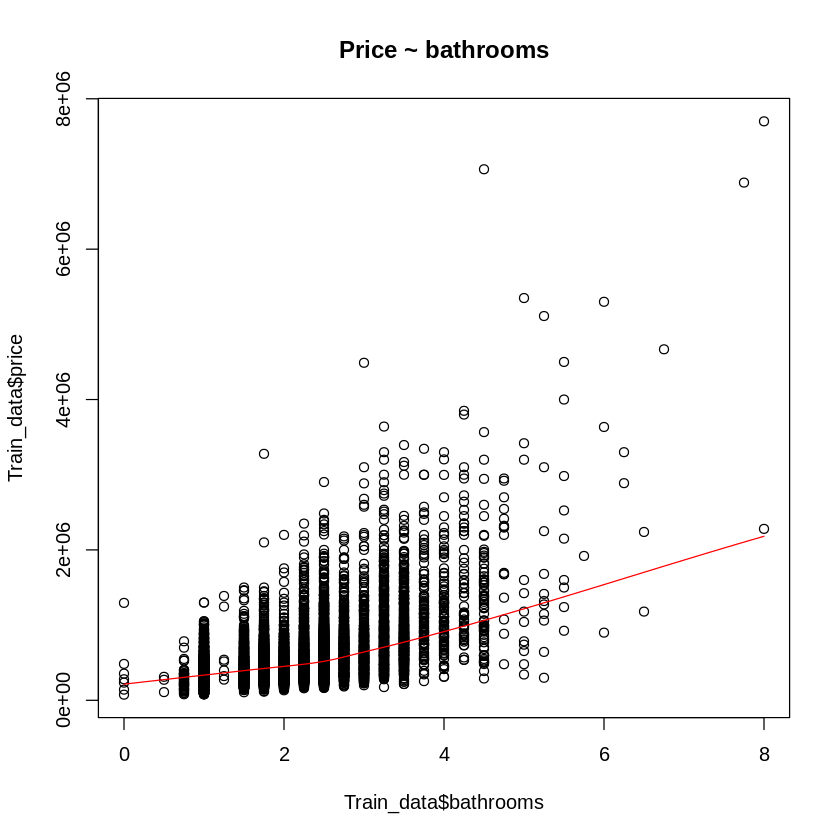

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“pseudoinverse used at 1.5”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“neighborhood radius 0.5”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“pseudoinverse used at 1.5”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“neighborhood radius 0.5”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“pseudoinverse used at 1.5”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“neighborhood radius 0.5”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“recipr

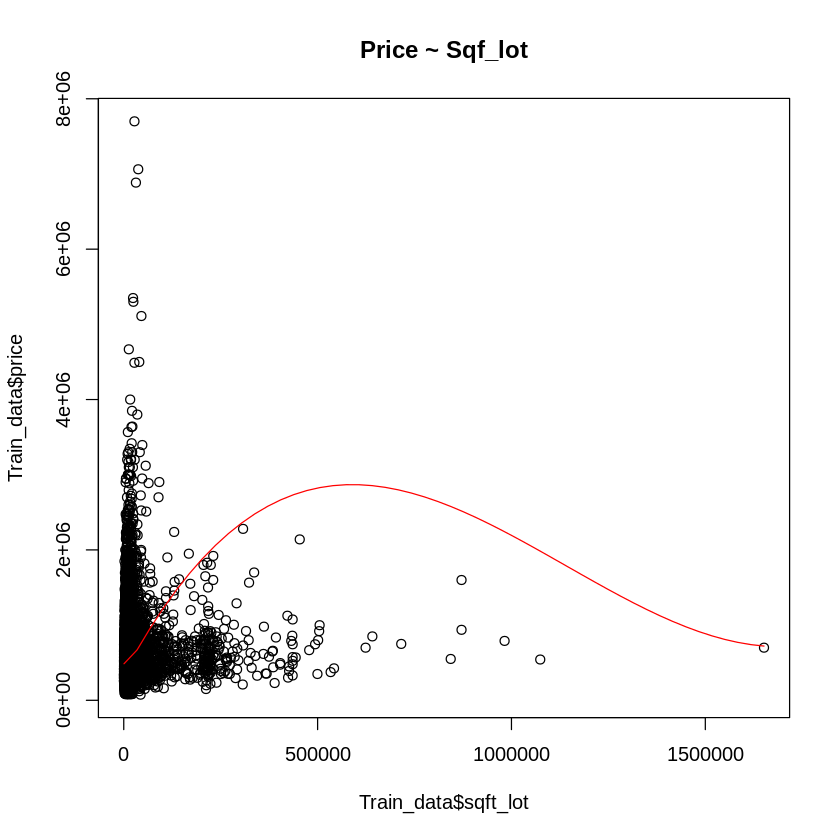

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“at  -0.005”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“radius  2.5e-05”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“all data on boundary of neighborhood. make span bigger”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“pseudoinverse used at -0.005”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“neighborhood radius 0.005”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“reciprocal condition number  1”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“There are other near singularities as well. 1.01”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“zero-width neighborhood. make span bigger”
Warning message in simpleLoess(y, x, w, span,

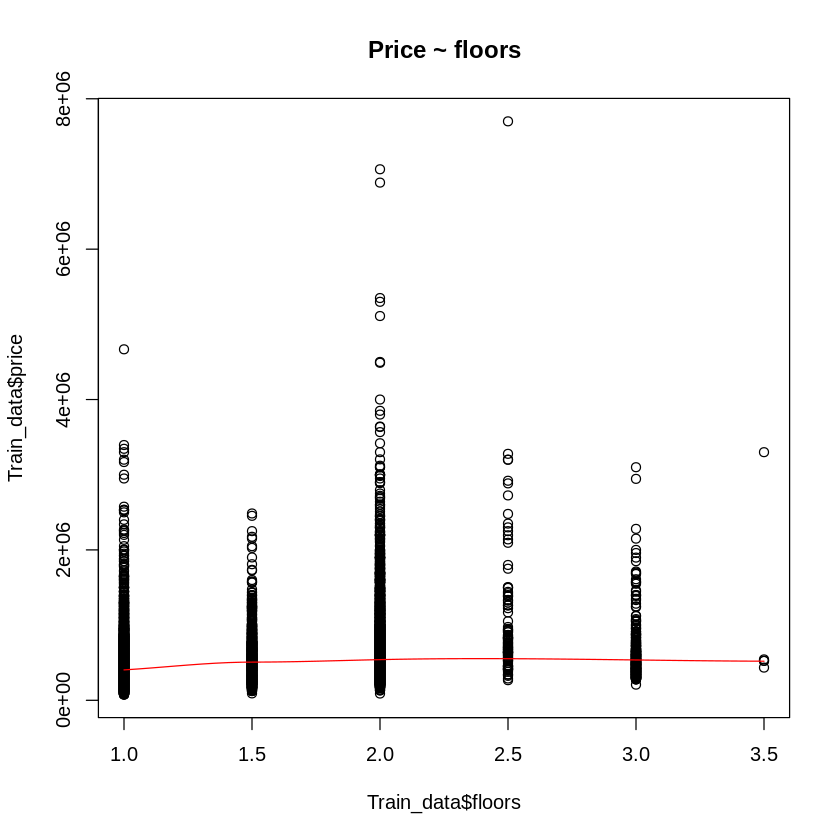

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“at  -0.02”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“radius  0.0004”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“all data on boundary of neighborhood. make span bigger”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“pseudoinverse used at -0.02”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“neighborhood radius 0.02”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“reciprocal condition number  1”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“zero-width neighborhood. make span bigger”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“at  -0.02”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“ra

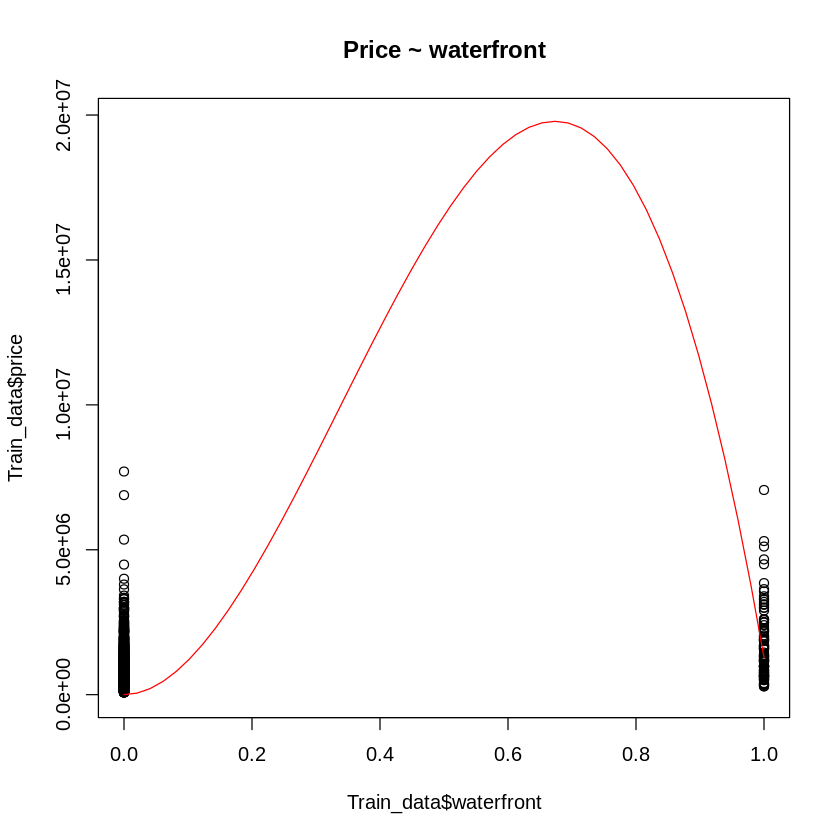

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“pseudoinverse used at 3”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“neighborhood radius 1”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“There are other near singularities as well. 1”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“pseudoinverse used at 3”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“neighborhood radius 1”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“There are other near singularities as well. 1”
Warning message in simpleLoess(y, x, w, span, degree = deg

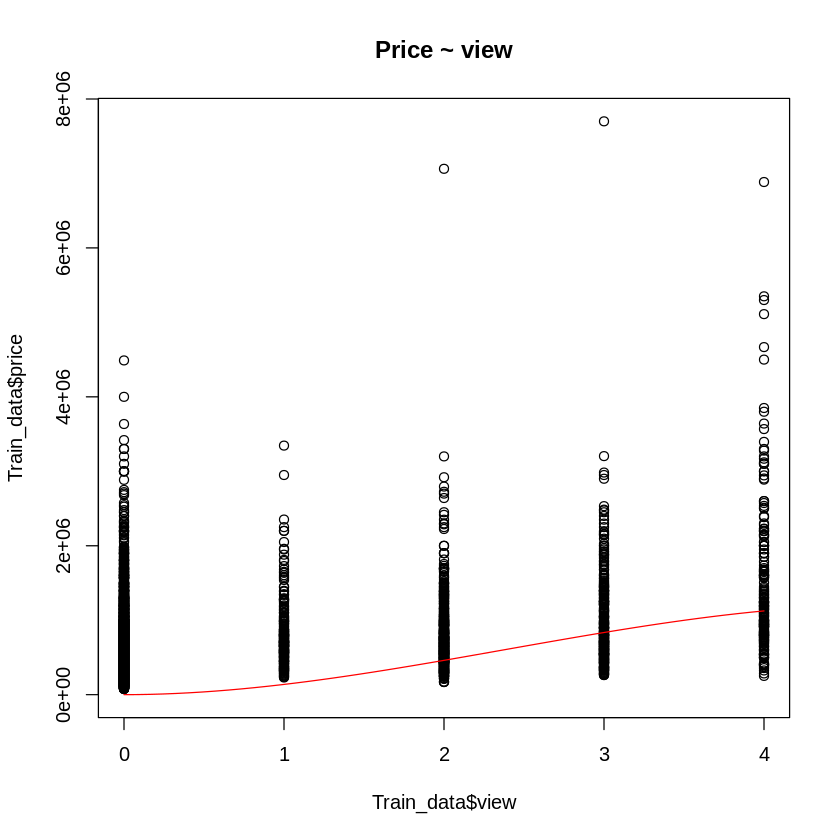

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“pseudoinverse used at 7”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“neighborhood radius 1”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“There are other near singularities as well. 1”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“pseudoinverse used at 7”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“neighborhood radius 1”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“There are other near singularities as well. 1”
Warning message in simpleLoess(y, x, w, span, degree = deg

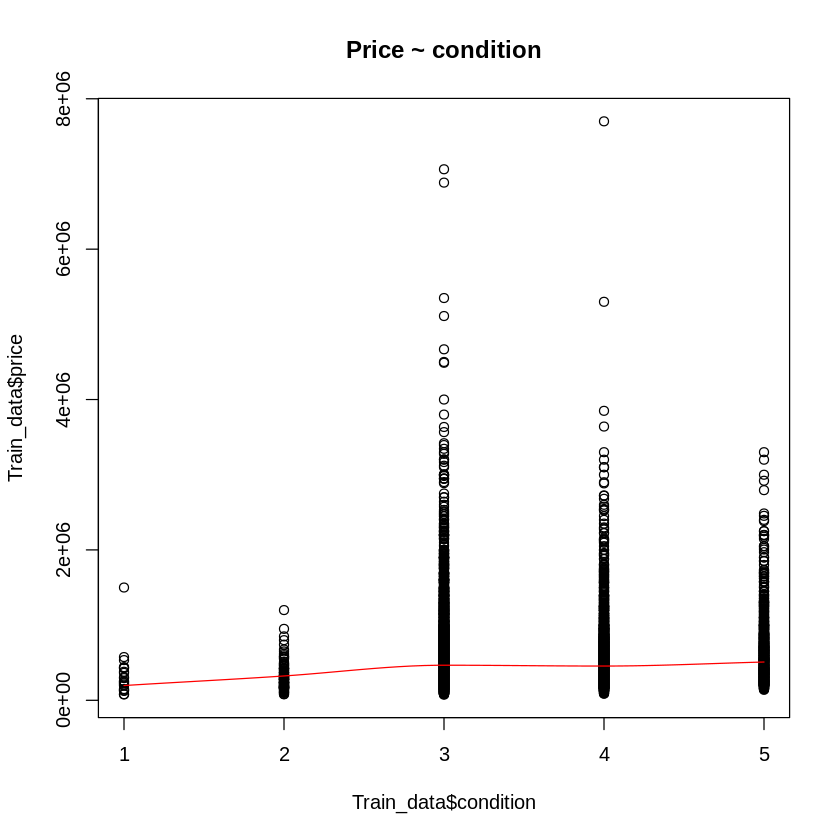

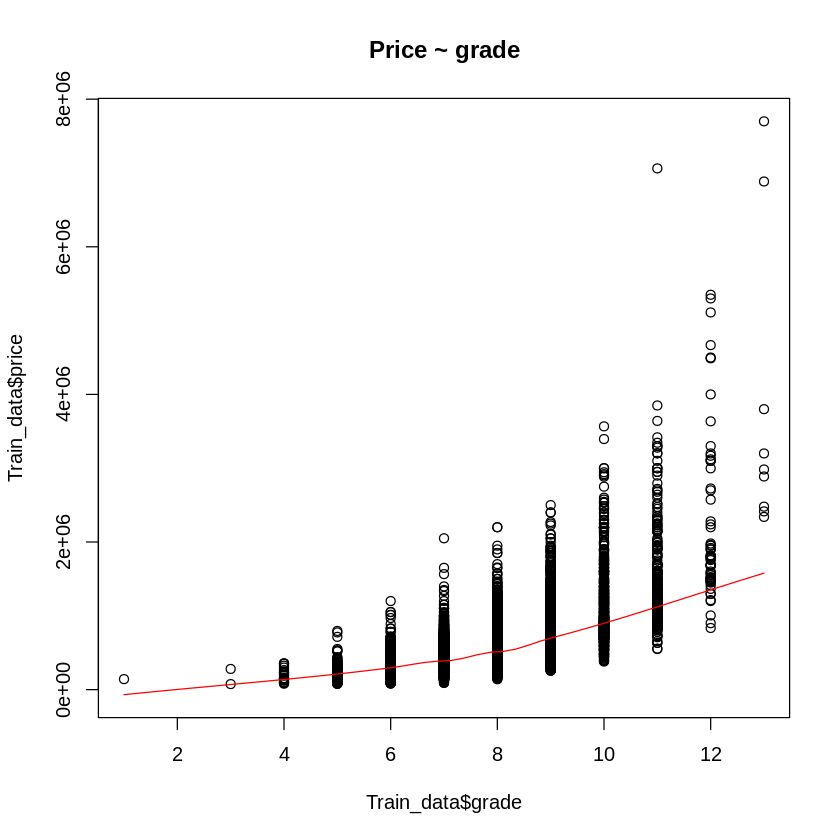

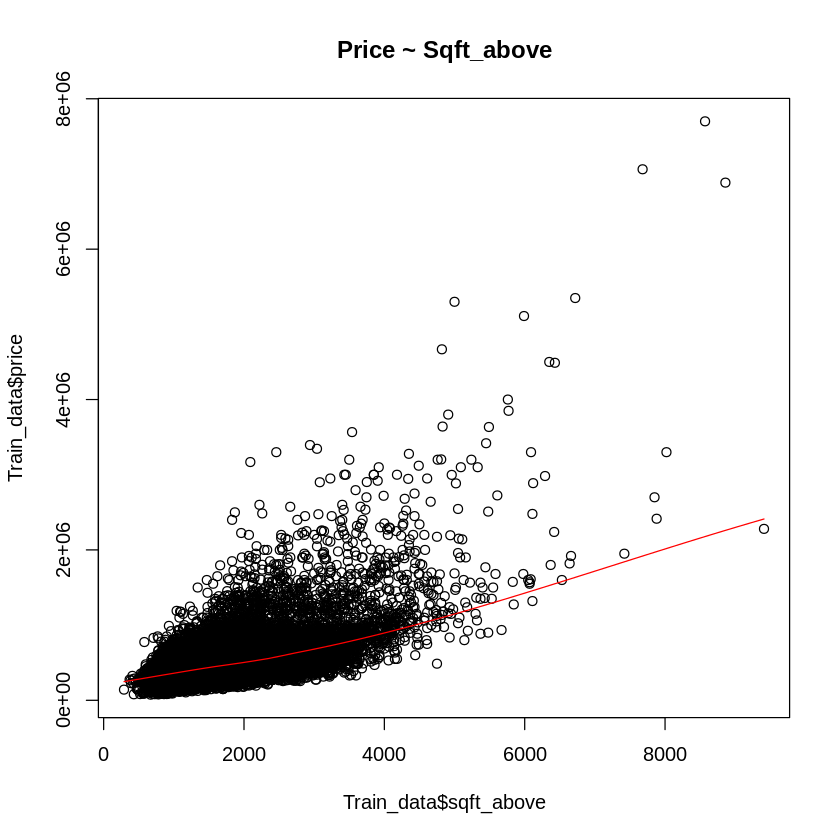

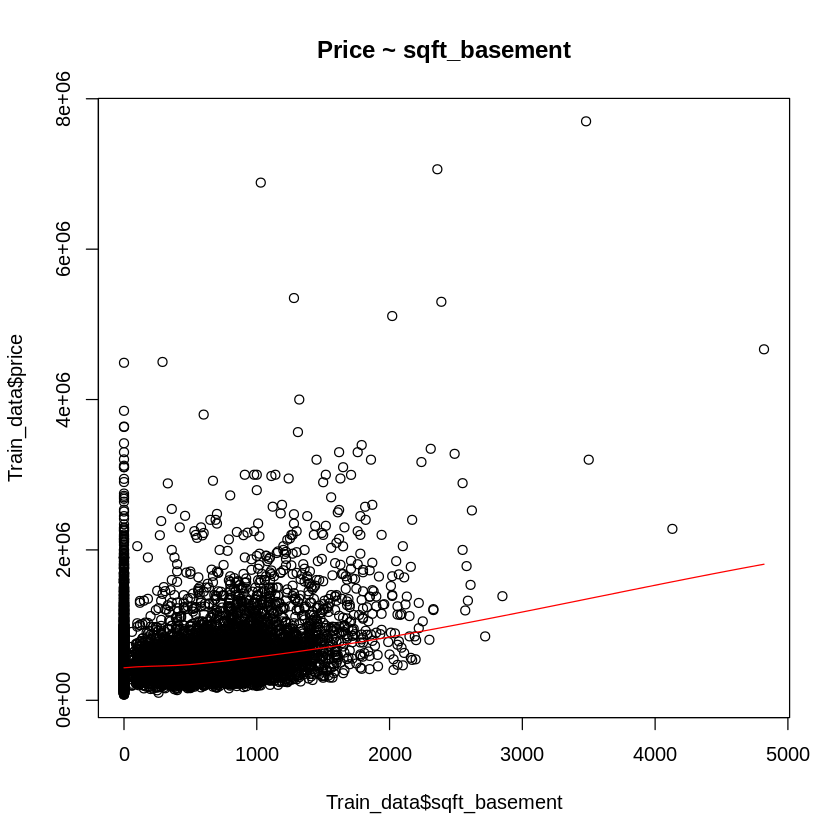

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“at  -10.075”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“radius  101.51”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“all data on boundary of neighborhood. make span bigger”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“pseudoinverse used at -10.075”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“neighborhood radius 10.075”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“reciprocal condition number  1”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“zero-width neighborhood. make span bigger”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
“at  -10.075”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALS

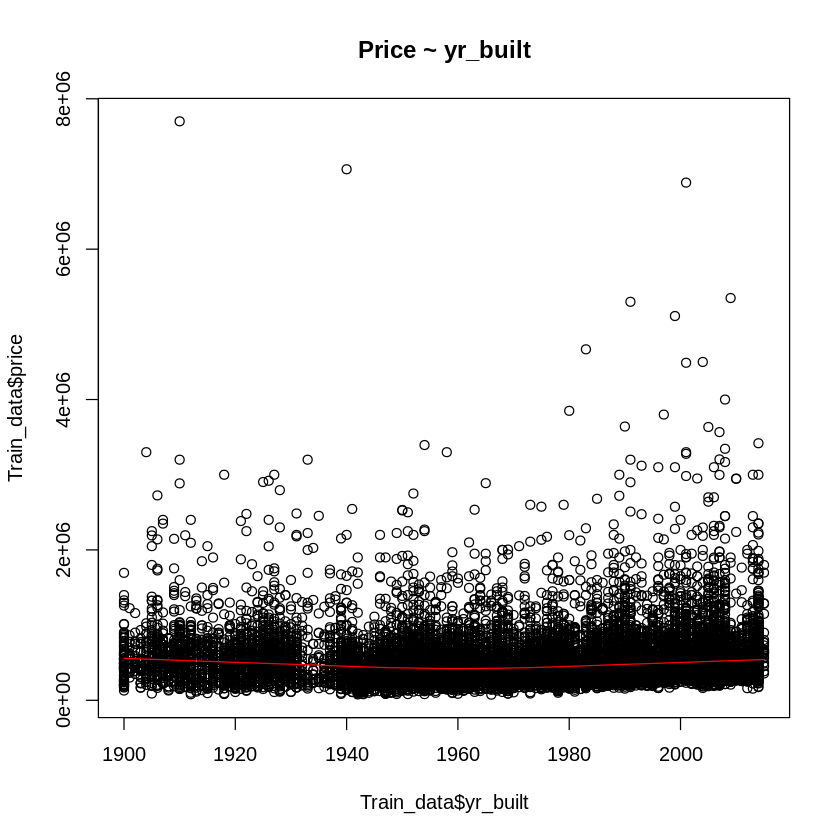

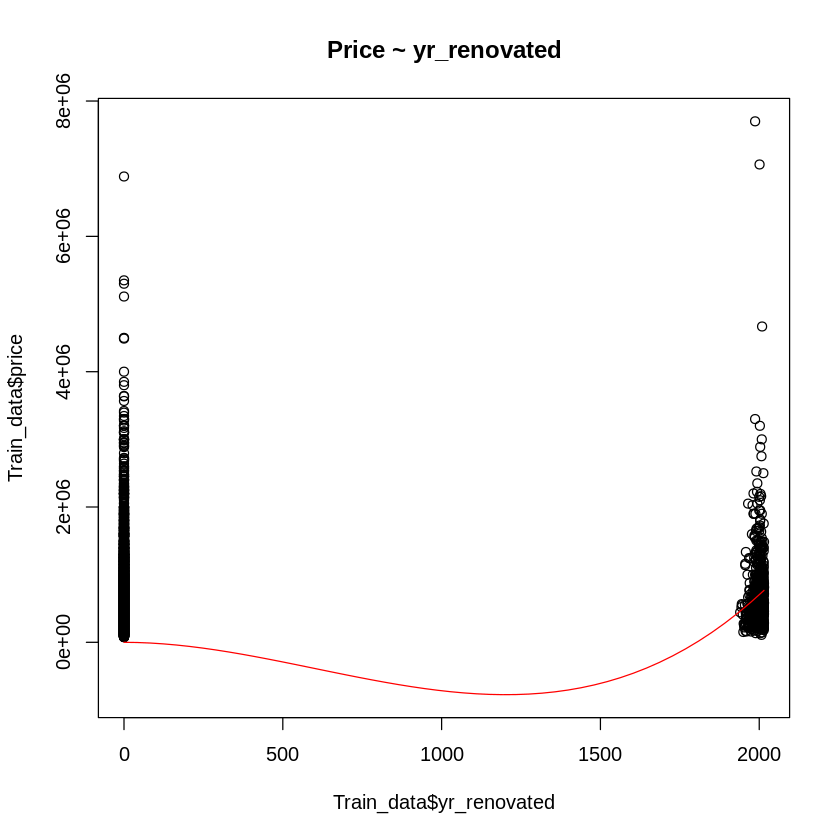

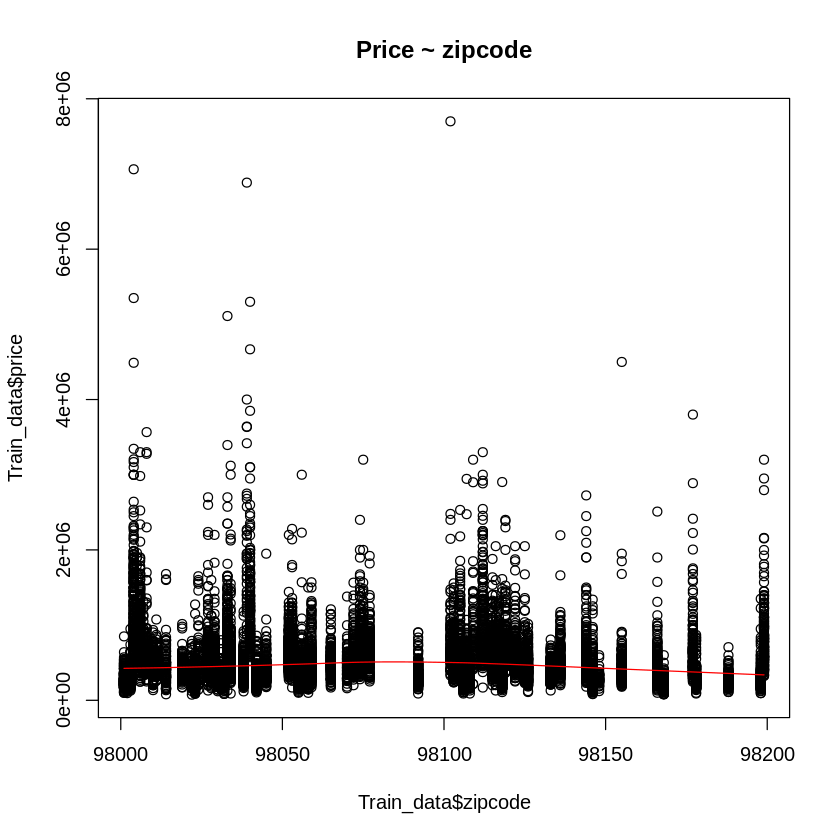

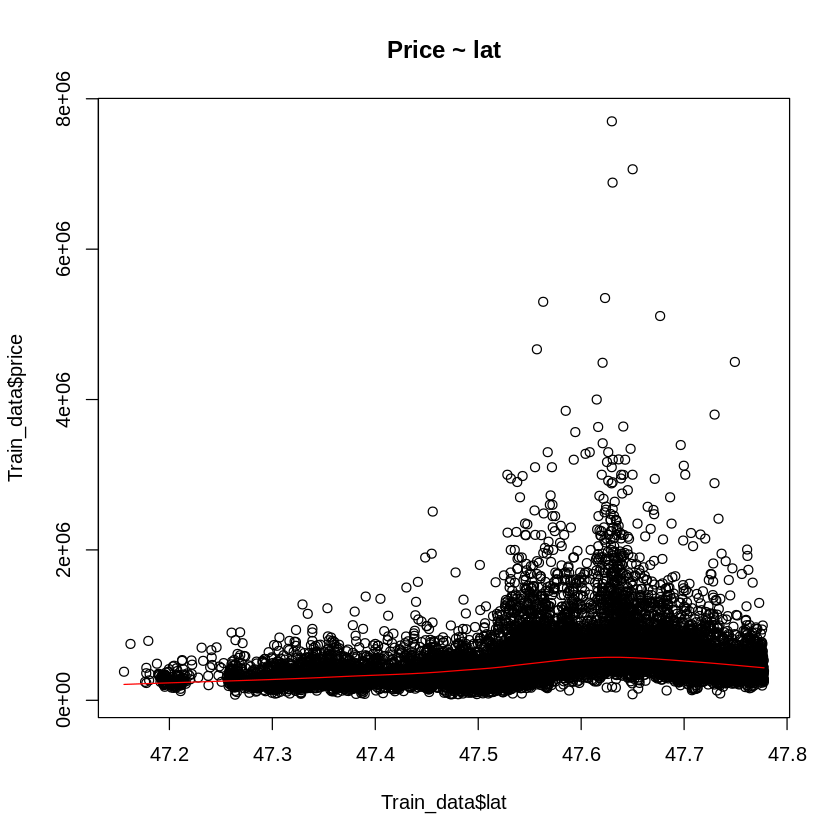

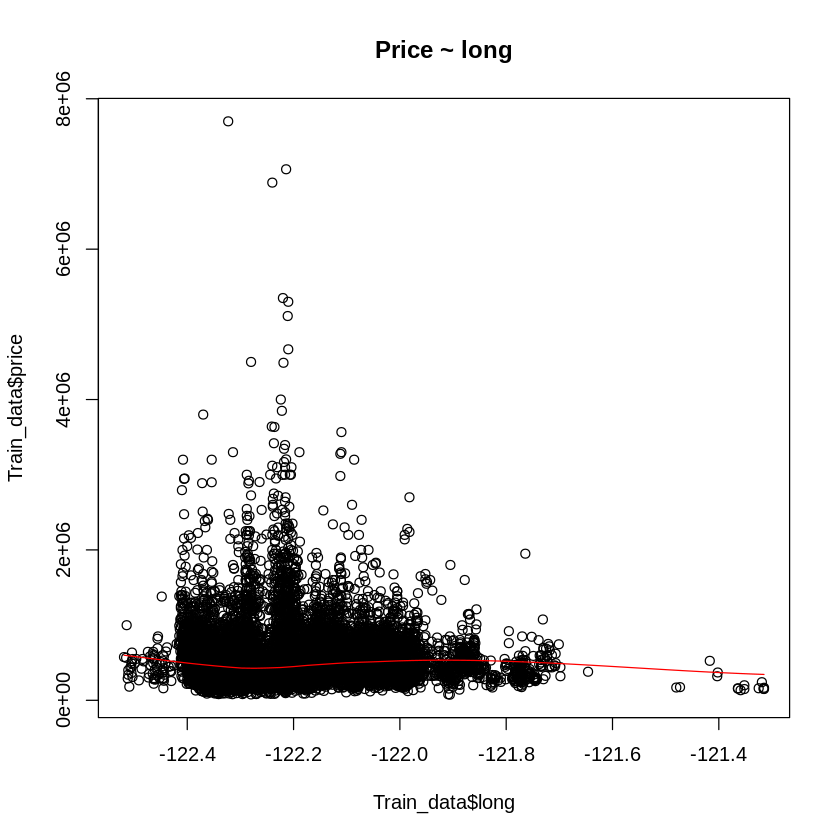

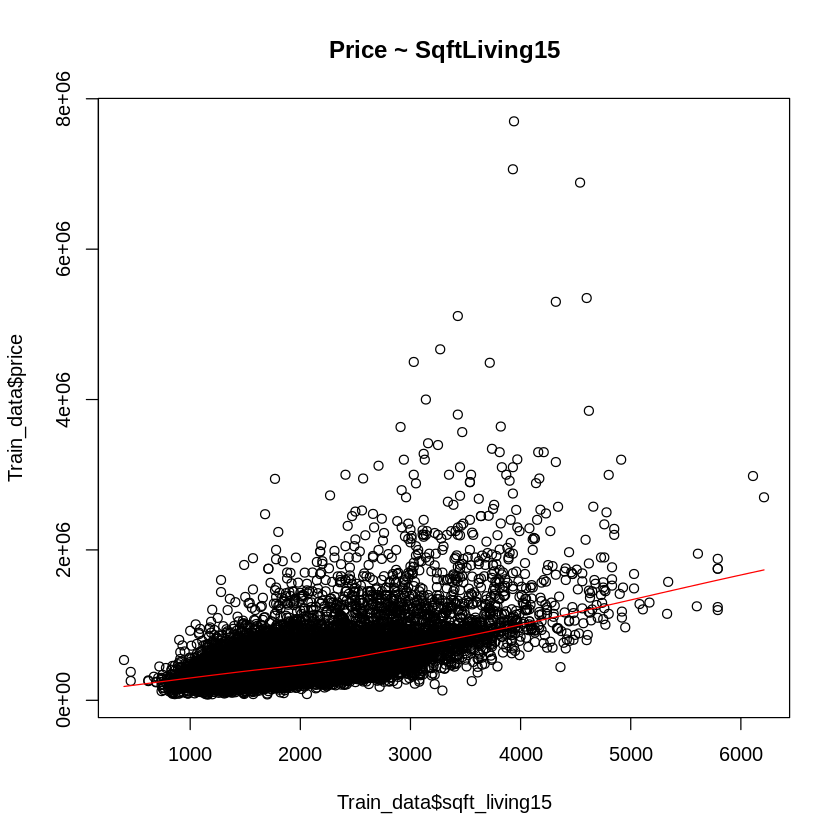

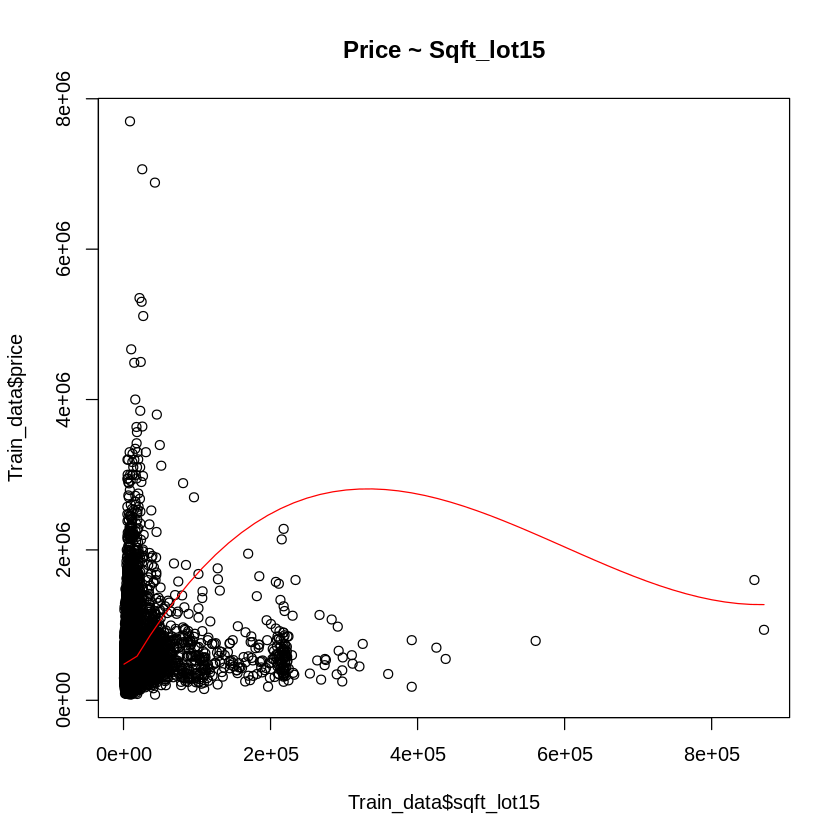

In [ ]:
##Display the linearity between price and other independent variables

#Price ~ SqftLiving
scatter.smooth(x=Train_data$sqft_living, y=Train_data$price,lpars =list(col = "red", lwd = 1, lty = 1), main = "Price ~ SqftLiving")
#Price ~ bedrooms
scatter.smooth(x=Train_data$bedrooms, y=Train_data$price,lpars =list(col = "red", lwd = 1, lty = 1), main = "Price ~ bedrooms")
#Price ~ bathrooms
scatter.smooth(x=Train_data$bathrooms, y=Train_data$price,lpars =list(col = "red", lwd = 1, lty = 1), main = "Price ~ bathrooms")
#Price ~ Sqf_lot
scatter.smooth(x=Train_data$sqft_lot, y=Train_data$price,lpars =list(col = "red", lwd = 1, lty = 1), main = "Price ~ Sqf_lot")
#Price ~floors
scatter.smooth(x=Train_data$floors, y=Train_data$price,lpars =list(col = "red", lwd = 1, lty = 1), main = "Price ~ floors")
#Price ~ waterfront
scatter.smooth(x=Train_data$waterfront, y=Train_data$price,lpars =list(col = "red", lwd = 1, lty = 1), main = "Price ~ waterfront")
#Price ~ view
scatter.smooth(x=Train_data$view, y=Train_data$price,lpars =list(col = "red", lwd = 1, lty = 1), main = "Price ~ view")
#Price ~ condition
scatter.smooth(x=Train_data$condition, y=Train_data$price,lpars =list(col = "red", lwd = 1, lty = 1), main = "Price ~ condition")
#Price ~ grade
scatter.smooth(x=Train_data$grade, y=Train_data$price,lpars =list(col = "red", lwd = 1, lty = 1), main = "Price ~ grade")
#Price ~ Sqft_above
scatter.smooth(x=Train_data$sqft_above, y=Train_data$price,lpars =list(col = "red", lwd = 1, lty = 1), main = "Price ~ Sqft_above")
#Price ~ sqft_basement
scatter.smooth(x=Train_data$sqft_basement, y=Train_data$price,lpars =list(col = "red", lwd = 1, lty = 1), main = "Price ~ sqft_basement")
#Price ~ yr_built
scatter.smooth(x=Train_data$yr_built, y=Train_data$price,lpars =list(col = "red", lwd = 1, lty = 1), main = "Price ~ yr_built")
#Price ~ yr_renovated
scatter.smooth(x=Train_data$yr_renovated, y=Train_data$price,lpars =list(col = "red", lwd = 1, lty = 1), main = "Price ~ yr_renovated")
#Price ~ zipcode
scatter.smooth(x=Train_data$zipcode, y=Train_data$price,lpars =list(col = "red", lwd = 1, lty = 1), main = "Price ~ zipcode")
#Price ~ lat
scatter.smooth(x=Train_data$lat, y=Train_data$price,lpars =list(col = "red", lwd = 1, lty = 1), main = "Price ~ lat")
#Price ~ long
scatter.smooth(x=Train_data$long, y=Train_data$price,lpars =list(col = "red", lwd = 1, lty = 1), main = "Price ~ long")
#Price ~ SqftLiving15
scatter.smooth(x=Train_data$sqft_living15, y=Train_data$price,lpars =list(col = "red", lwd = 1, lty = 1), main = "Price ~ SqftLiving15")
#Price ~ Sqft_lot15
scatter.smooth(x=Train_data$sqft_lot15, y=Train_data$price,lpars=list(col = "red", lwd = 1, lty = 1), main = "Price ~ Sqft_lot15")

## Regression Model

In [ ]:
#creating the Regression model
Housemodel_i1<- lm(log(price) ~ bedrooms+bathrooms+sqft_living+floors+waterfront+view+condition+grade+sqft_above+yr_built+yr_renovated+lat+long+sqft_living15+ sqft_lot15, data = Train_data)
summary(Housemodel_i1)# Multiple R-Squared : 0.7684



Call:
lm(formula = log(price) ~ bedrooms + bathrooms + sqft_living + 
    floors + waterfront + view + condition + grade + sqft_above + 
    yr_built + yr_renovated + lat + long + sqft_living15 + sqft_lot15, 
    data = Train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.71176 -0.16096  0.00326  0.15701  1.21596 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -5.228e+01  2.379e+00 -21.975  < 2e-16 ***
bedrooms      -9.605e-03  2.798e-03  -3.433 0.000598 ***
bathrooms      7.084e-02  4.905e-03  14.443  < 2e-16 ***
sqft_living    1.413e-04  6.639e-06  21.288  < 2e-16 ***
floors         6.831e-02  5.426e-03  12.589  < 2e-16 ***
waterfront     3.567e-01  2.719e-02  13.121  < 2e-16 ***
view           5.617e-02  3.266e-03  17.197  < 2e-16 ***
condition      6.752e-02  3.536e-03  19.096  < 2e-16 ***
grade          1.637e-01  3.269e-03  50.082  < 2e-16 ***
sqft_above    -1.118e-05  6.595e-06  -1.695 0.090152 .  
yr_built      -3.248e

In [ ]:
pred <- predict(Housemodel_i1,Test_data)
summary(pred)



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.68   12.73   13.01   13.05   13.29   15.30 